Experiment on H0 summaries on different autocorrlation data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from geodata import generate_grid_dataframe,calculate_moran_i

In [2]:
grid_size = 10
r_seed = 42

In [3]:
gdf_none = generate_grid_dataframe(grid_size, autocorrelation="none", random_seed=r_seed)        # No spatial correlation
gdf_positive = generate_grid_dataframe(grid_size, autocorrelation="positive", random_seed=r_seed)  # Positive spatial correlation

In [4]:
# Calculate Moran’s I
moran_none = calculate_moran_i(gdf_none, grid_size)
moran_positive = calculate_moran_i(gdf_positive, grid_size)

# Display Moran's I values
print(f"Moran's I (No Autocorrelation): {moran_none}")
print(f"Moran's I (Positive Autocorrelation): {moran_positive}")

Moran's I (No Autocorrelation): -0.05438727909210017
Moran's I (Positive Autocorrelation): 0.8714759278151759


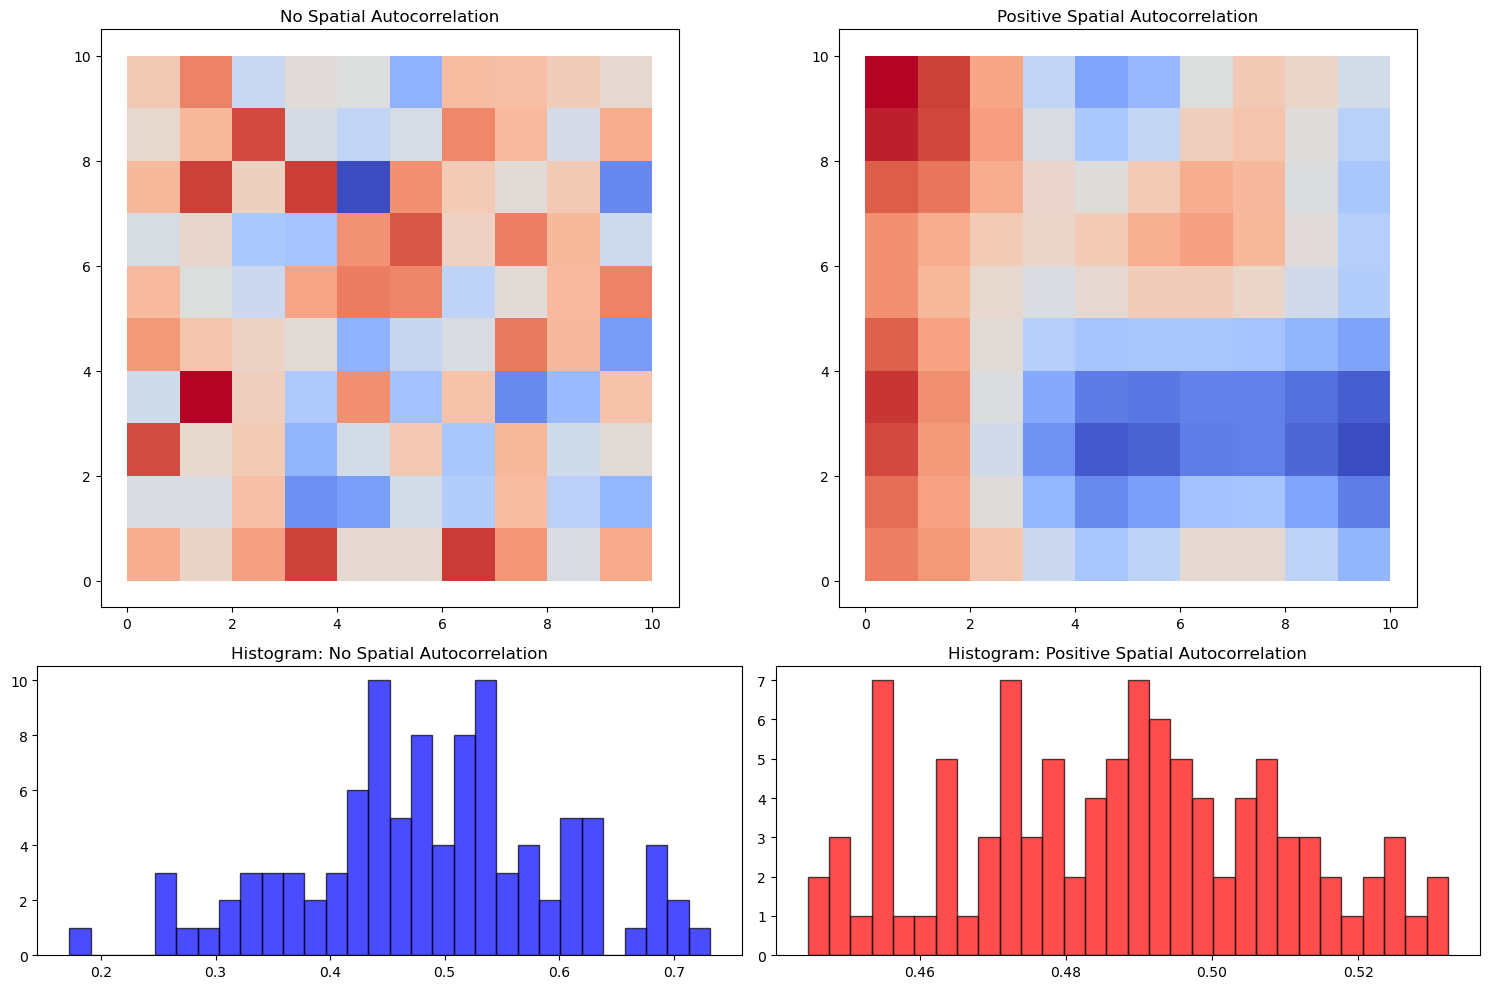

In [5]:
# Create figure with two rows: one for maps, one for histograms
fig, axs = plt.subplots(2, 2, figsize=(15, 10), gridspec_kw={'height_ratios': [2, 1]})

# Plot the maps
gdf_none.plot(column='Value', cmap='coolwarm', legend=False, ax=axs[0, 0])
gdf_positive.plot(column='Value', cmap='coolwarm', legend=False, ax=axs[0, 1])

# Set titles for maps
axs[0, 0].set_title("No Spatial Autocorrelation")
axs[0, 1].set_title("Positive Spatial Autocorrelation")

# Plot histograms
axs[1, 0].hist(gdf_none['Value'], bins=30, color='blue', alpha=0.7, edgecolor='black')
axs[1, 1].hist(gdf_positive['Value'], bins=30, color='red', alpha=0.7, edgecolor='black')

# Set titles for histograms
axs[1, 0].set_title("Histogram: No Spatial Autocorrelation")
axs[1, 1].set_title("Histogram: Positive Spatial Autocorrelation")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Let's compute simplicial complex

In [6]:
gdf_positive

,Index,Value,geometry
0,0,0.515726,"POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))"
1,1,0.510445,"POLYGON ((1 0, 2 0, 2 1, 1 1, 1 0))"
2,2,0.498830,"POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))"
3,3,0.482735,"POLYGON ((3 0, 4 0, 4 1, 3 1, 3 0))"
4,4,0.473196,"POLYGON ((4 0, 5 0, 5 1, 4 1, 4 0))"
...,...,...,...
95,95,0.469634,"POLYGON ((5 9, 6 9, 6 10, 5 10, 5 9))"
96,96,0.488180,"POLYGON ((6 9, 7 9, 7 10, 6 10, 6 9))"
97,97,0.498009,"POLYGON ((7 9, 8 9, 8 10, 7 10, 7 9))"
98,98,0.493056,"POLYGON ((8 9, 9 9, 9 10, 8 10, 8 9))"


In [14]:
from adjacency_simplex import AdjacencySimplex  # Import the class
from plot_utills import plot_simplicial_complex_gif
from calculate_tda_summaries import compute_persistence

In [24]:
# Initialize the AdjacencySimplex class
adj_simplex = AdjacencySimplex(gdf_none, 'Value', threshold = None, filter_method = 'down')

# Filter the GeoDataFrame
filtered_df,gdf_id = adj_simplex.filter_sort_gdf()

# Calculate the adjacent countries
adj_simplex.calculate_adjacent_countries()

# Form the simplicial complex
simplex = adj_simplex.form_simplicial_complex()

# Call the function
# list_gif = plot_simplicial_complex_gif(dataframe=gdf_id, simplices=simplex, variable='Value')

# list_gif[0].save('test_0.gif', save_all=True,append_images=list_gif[1:],optimize=False,duration=200,loop=0) 

total_h0_points, tl, al, tml, aml = compute_persistence(simplex,filtered_df, 'Value')


In [23]:
# up
print('Total number of H0 points:', total_h0_points)
print('Total  lifespan:', tl)
print('Average lifespan:', al)
print('Total mid lifespan:', tml)
print('Average mid lifespan:', aml)

Total number of H0 points: 100
Total  lifespan: 65.58700652819286
Average lifespan: 0.6558700652819286
Total mid lifespan: 32.79350326409643
Average mid lifespan: 0.3279350326409643


In [25]:
# down
print('Total number of H0 points:', total_h0_points)
print('Total  lifespan:', tl)
print('Average lifespan:', al)
print('Total mid lifespan:', tml)
print('Average mid lifespan:', aml)

Total number of H0 points: 100
Total  lifespan: 48.67448713579647
Average lifespan: 0.4867448713579647
Total mid lifespan: 24.337243567898234
Average mid lifespan: 0.24337243567898234


up

In [21]:
print('Total number of H0 points:', total_h0_points)
print('Total  lifespan:', tl)
print('Average lifespan:', al)
print('Total mid lifespan:', tml)
print('Average mid lifespan:', aml)

Total number of H0 points: 100
Total  lifespan: 64.29785248365994
Average lifespan: 0.6429785248365993
Total mid lifespan: 32.14892624182997
Average mid lifespan: 0.32148926241829967


In [17]:
print('Total number of H0 points:', total_h0_points)
print('Total  lifespan:', tl)
print('Average lifespan:', al)
print('Total mid lifespan:', tml)
print('Average mid lifespan:', aml)

Total number of H0 points: 100
Total  lifespan: 62.707156202473136
Average lifespan: 0.6270715620247314
Total mid lifespan: 31.353578101236568
Average mid lifespan: 0.3135357810123657
